<a href="https://colab.research.google.com/github/takatakamanbou/ML/blob/2023/omake03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML omake03

<img width=64 src="https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/ML-logo.png">


----
# 小さなカラー画像を最短距離法・最近傍法で識別してみよう
----



---
## 準備

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

### データの入手

ここでは，CIFAR10 と呼ばれる，10クラスから成る小さな画像のデータセットを扱います．オリジナルの CIFAR10 は各クラス6000枚，合計6万枚の画像から成りますが，ここではそこからランダムに600x10 = 6000枚を抽出したものを使うことにします．

In [9]:
! wget -nc https://www-tlab.math.ryukoku.ac.jp/~takataka/course/ML/minicifar10.npz
rv = np.load('minicifar10.npz')
XL = rv['datL'].astype(float)
YL = rv['labL']
XT = rv['datT'].astype(float)
YT = rv['labT']
classname = rv['classname']
print(XL.shape, YL.shape, XT.shape, YT.shape)

File ‘minicifar10.npz’ already there; not retrieving.

(5000, 3072) (5000,) (1000, 3072) (1000,)


`XL` が学習用のデータの配列，`YL` がそのクラスラベルを表す整数値，`XT` がテスト用のデータの配列，`YT` がそのクラスラベルを表す整数値です．クラスラベルの整数値は 0 から 9 までで，それぞれ次のものを表します．

In [10]:
K = 10
for ik in range(K):
    print(ik, classname[ik])

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


## 画像を眺めてみる

画像を表示させる関数を定義しておきます．ex03notebookA や B で使っている `display` 関数と似てますが使い方が少し違うので注意．

In [6]:
#####  データの最初の nx x ny 枚を可視化する関数（カラー版）の定義
#         （画素値の格納順は [H, W, C] で C は BGR ではなく RGB を仮定）
#
def mosaicImageC(ax, dat, nx, ny, nrow=32, ncol=32, gap=4):

    # 並べた画像の幅と高さ
    width  = nx * (ncol + gap) + gap
    height = ny * (nrow + gap) + gap

    # 画像の作成
    img = np.zeros((height, width, 3), dtype=int) + 128
    for iy in range(ny):
        lty = iy*(nrow + gap) + gap
        for ix in range(nx):
            if iy*nx+ix >= dat.shape[0]:
                break
            ltx = ix*(ncol + gap) + gap
            img[lty:lty+nrow, ltx:ltx+ncol, :] = dat[iy*nx+ix, :].reshape((nrow, ncol, 3))

    # 表示
    ax.axis('off')
    ax.imshow(img)

次のセルを実行すると，`XL` の最初の 40 個のデータを 8 列 x 5 行に並べた画像を表示します．

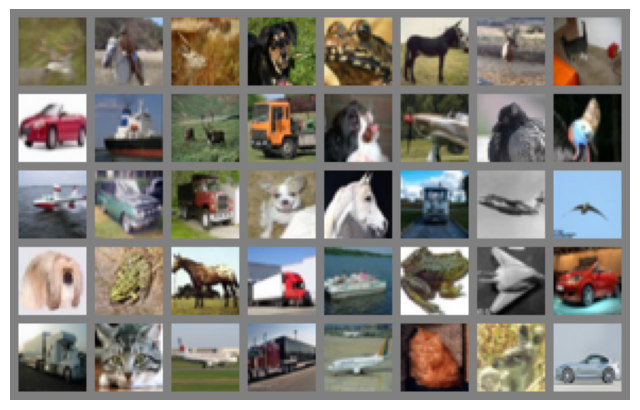

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
mosaicImageC(ax, XL[:40, :], 8, 5)
plt.show()

----
## 最短距離法で識別してみよう

以下に適当にセルを追加して，上記のデータを使って最短距離法による識別を行う実験をしましょう．

- ex03notebookA の手書き数字識別のコードを参考にしたらよいでしょう．
- 学習データのクラスごとの平均をプロトタイプとしましょう．`mosaicImage` を使ってプロトタイプを可視化しましょう．
- 学習データとテストデータを識別したときの正答率を算出しましょう．
- 手書き数字の場合と違い，プロトタイプはよい見本とは言えず，正答率もあまり良くならないでしょう．もっと良い結果を得たければ，もっと複雑なモデル・方法を使うことが必要になります．

----
## 最近傍法で識別してみよう

以下に適当にセルを追加して，上記のデータを使って最近傍法による識別を行う実験をしましょう．ex03notebookB の手書き数字識別のコードを参考にしたらよいでしょう．

